# Random Forest using churn data

## Import Libraries

### Standard Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Additional Libraries

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">**MinMaxScaler**</a>: *Transforms features by scaling each feature to a given range.This estimator scales and translates each feature individually such that it is in the given range on the training set, i.e. between zero and one.*

In [3]:
from sklearn import datasets, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

## Load and Explore the Dataset

Telecom Churn Dataset

In [4]:
#Provide the path of the dataset
df = pd.read_csv("../Datasets/Churn_Cleaned.csv", index_col=0)

In [5]:
#Check the dataset
df.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Churn_True.
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [6]:
#Check the min, max, and mean values to determine if features are on the same scale
df.describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Churn_True.
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,...,0.019802,0.023402,0.031803,0.023102,0.251425,0.496550,0.252025,0.096910,0.276628,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,...,0.139340,0.151200,0.175502,0.150251,0.433897,0.500063,0.434241,0.295879,0.447398,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Check the number of observations and features
df.shape

(3333, 72)

In [8]:
#Identify and check the value counts of the target variable
df['Churn_True.'].value_counts()

0.0    2850
1.0     483
Name: Churn_True., dtype: int64

## Build the Model

In [9]:
#Separate the Features and the Target Variable
X = df.drop(["Churn_True."], axis=1)
y = df["Churn_True."]

In [10]:
X

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_VT,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,36,156.2,77,26.55,215.5,126,18.32,279.1,83,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3329,68,0,231.1,57,39.29,153.4,55,13.04,191.3,123,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3330,28,0,180.8,109,30.74,288.8,58,24.55,191.9,91,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3331,184,0,213.8,105,36.35,159.6,84,13.57,139.2,137,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [11]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3328    0.0
3329    0.0
3330    0.0
3331    0.0
3332    0.0
Name: Churn_True., Length: 3333, dtype: float64

In [12]:
#Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=56)

# 999 - test (validate the model)
# 2334 - train (to build model)

In [13]:
#Check shape to make sure it is all in order
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 71), (1000, 71), (2333,), (1000,))

### Scaling the Dataset

Scale the features using the MinMaxScaler

In [14]:
#Instantiate the MinMax Scaler
minmax = MinMaxScaler()

#Fit the scaler to the training set
minmax.fit(X_train)

#Transform the training set
X_train_scaled = minmax.transform(X_train)

#Transform the test set
X_test_scaled = minmax.transform(X_test)

In [15]:
#View the scaled data
X_train_scaled

array([[0.40909091, 0.        , 0.20415225, ..., 0.        , 0.        ,
        0.        ],
       [0.10743802, 0.        , 0.55882353, ..., 1.        , 0.        ,
        0.        ],
       [0.51239669, 0.        , 0.661188  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.36363636, 0.48      , 0.28200692, ..., 0.        , 0.        ,
        1.        ],
       [0.26859504, 0.        , 0.48241061, ..., 0.        , 0.        ,
        0.        ],
       [0.71487603, 0.        , 0.54873126, ..., 0.        , 0.        ,
        0.        ]])

In [16]:
#View the type of the scaled data
type(X_train_scaled)

numpy.ndarray

In [17]:
#Change to Pandas dataframe for easier viewing and manipulation of the data
X_train_sdf = pd.DataFrame(X_train_scaled, index=X_train.index, columns=X_train.columns)
X_test_sdf = pd.DataFrame(X_test_scaled, index=X_test.index, columns=X_test.columns)

In [18]:
#Check the min, max, and mean values to determine if features are on the same scale
X_train_sdf.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_VT,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes
1919,0.409091,0.00,0.204152,0.569697,0.204206,0.595909,0.600000,0.596098,0.558365,0.640288,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
667,0.107438,0.00,0.558824,0.618182,0.558853,0.328635,0.611765,0.328780,0.303120,0.633094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
59,0.512397,0.00,0.661188,0.624242,0.661126,0.490326,0.741176,0.490407,0.446746,0.424460,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2019,0.165289,0.60,0.552768,0.660606,0.552748,0.533444,0.505882,0.533659,0.339430,0.410072,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1596,0.256198,0.98,0.619666,0.521212,0.619573,0.547816,0.523529,0.547967,0.396988,0.741007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [19]:
#View the dataset
X_test_sdf.head()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_VT,State_WA,State_WI,State_WV,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes
2858,0.578512,0.56,0.888120,0.745455,0.888060,0.684909,0.752941,0.684878,0.348843,0.482014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1508,0.380165,0.00,0.439446,0.448485,0.439450,0.758983,0.517647,0.759024,0.615923,0.604317,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20,0.603306,0.00,0.447232,0.709091,0.447252,0.662521,0.547059,0.662439,0.499193,0.697842,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
308,0.458678,0.00,0.560554,0.612121,0.560550,0.525981,0.482353,0.526179,0.430877,0.510791,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2758,0.301653,0.00,0.511534,0.824242,0.511533,0.664179,0.611765,0.664390,0.575847,0.697842,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Train the Model

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">**Logistic Regression**</a>

C = Inverse of regularization strength; must be a positive float. Smaller values specify stronger regularization.

In [20]:
#Instantiate the Algorithm 
logreg = RandomForestClassifier(criterion="gini", min_samples_split=2, min_samples_leaf=1, max_depth=12, 
                            n_estimators=15, random_state=35)

In [21]:
logreg

RandomForestClassifier(max_depth=12, n_estimators=15, random_state=35)

In [22]:
y_train

1919    1.0
667     0.0
59      0.0
2019    0.0
1596    0.0
       ... 
1259    0.0
1442    1.0
3264    0.0
399     1.0
2532    0.0
Name: Churn_True., Length: 2333, dtype: float64

In [23]:
#Train/Fit the model
logreg.fit(X_train_sdf, y_train)

RandomForestClassifier(max_depth=12, n_estimators=15, random_state=35)

In [24]:
y_train_pred = logreg.predict(X_train_sdf)
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_train, y_train_pred)))

Classification report for classifier RandomForestClassifier(max_depth=12, n_estimators=15, random_state=35):
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      1974
         1.0       1.00      0.86      0.92       359

    accuracy                           0.98      2333
   macro avg       0.99      0.93      0.95      2333
weighted avg       0.98      0.98      0.98      2333




## Validate the Model

In [25]:
#Make Predictions
y_pred = logreg.predict(X_test_sdf) # y_prediction = y_test

In [26]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier RandomForestClassifier(max_depth=12, n_estimators=15, random_state=35):
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97       876
         1.0       0.93      0.53      0.68       124

    accuracy                           0.94      1000
   macro avg       0.93      0.76      0.82      1000
weighted avg       0.94      0.94      0.93      1000




In [27]:
print("Confusion matrix:\n%s" % confusion_matrix(y_test, y_pred))

Confusion matrix:
[[871   5]
 [ 58  66]]


Text(0.5, 23.5, 'Predicted label')

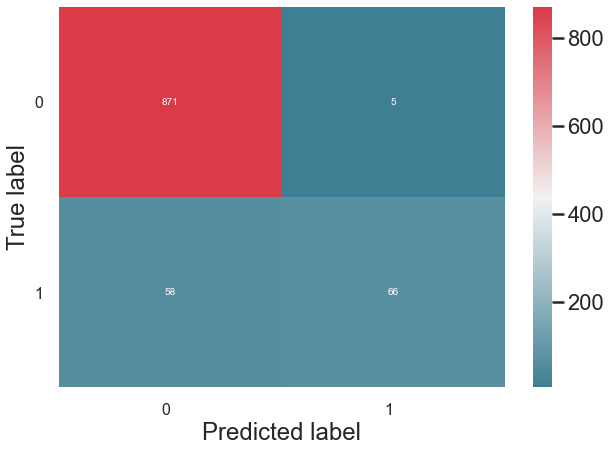

In [28]:
#Plot the confusion matrix for easier viewing
cm = confusion_matrix(y_test, y_pred)

df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
heatmap = sns.heatmap(df_cm,annot=True, fmt="d", cmap=cmap)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [29]:
#Predict the Probabilities
pred_prob_0 = logreg.predict_proba(X_test_sdf)[:,0]
pred_prob_1 = logreg.predict_proba(X_test_sdf)[:,1]

In [30]:
#Put all information on a DataFrame for analysis
df_results = X_test.copy()

df_results["Actual_Class"] = y_test
df_results["Predicted_Class"] = y_pred
df_results["Predicted_Prob(0)"] = pred_prob_0
df_results["Predicted_Prob(1)"] = pred_prob_1

In [31]:
df_results.head(100)

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,...,State_WY,Area Code_408,Area Code_415,Area Code_510,Intl Plan_yes,VMail Plan_yes,Actual_Class,Predicted_Class,Predicted_Prob(0),Predicted_Prob(1)
2858,141,28,308.0,123,52.36,247.8,128,21.06,152.9,103,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.832648,0.167352
1508,93,0,152.4,74,25.91,274.6,88,23.34,252.2,120,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.971485,0.028515
20,147,0,155.1,117,26.37,239.7,93,20.37,208.8,133,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.864654,0.135346
308,112,0,194.4,101,33.05,190.3,82,16.18,183.4,107,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.944573,0.055427
2758,74,0,177.4,136,30.16,240.3,104,20.43,237.3,133,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.928164,0.071836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,114,28,225.8,94,38.39,193.0,117,16.41,232.4,100,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.789417,0.210583
3181,121,0,215.6,74,36.65,192.9,98,16.40,144.0,103,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.832330,0.167670
22,130,0,183.0,112,31.11,72.9,99,6.20,181.8,78,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.923343,0.076657
1931,81,0,250.6,85,42.60,187.9,50,15.97,120.3,131,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.772924,0.227076
